In [1]:
import pypsa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '/media/pklein/SATA_SSD/GitHub/pypsa_utilities/eskom data/')

import data_utilities as du
import plotting_utilities as pu
import financial_utilities as fu

import random
from random import randrange

ERROR 1: PROJ: proj_create_from_database: Open of /home/pklein/anaconda3/envs/pypsa-eur/share/proj failed


In [3]:
eskom_data = pd.read_excel('../data/Eskom EAF data.xlsx',sheet_name='eskom_data',index_col=[1,0],parse_dates=True)
planned_monthly_avg_data = pd.read_excel('../data/Eskom EAF data.xlsx',sheet_name='planned_monthly_avg',index_col=[0,1],parse_dates=True)
planned_projected = pd.read_excel('../data/Eskom EAF data.xlsx',sheet_name='planned',index_col=[0,1],parse_dates=True)
unplanned_projected = pd.read_excel('../data/Eskom EAF data.xlsx',sheet_name='unplanned',index_col=[0,1],parse_dates=True)
stations={}

for tech in eskom_data['type'].unique():
    stations[tech]=eskom_data[eskom_data.type==tech].index.get_level_values(0).unique()
del stations['total']

In [2]:
eskom_data = du.eskom_data('../data/ESK3272.csv')

Text(0.5, 0, '')

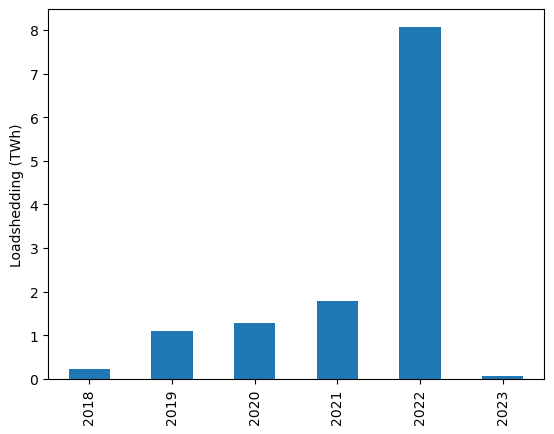

In [6]:
(eskom_data['loadshed_mlr'].groupby(eskom_data.index.year).sum()/1e6).plot.bar()
plt.ylabel('Loadshedding (TWh)')
plt.xlabel('')

In [8]:
eskom_data['wind'].divide(eskom_data['wind_installed']).to_clipboard()

In [14]:
eskom_data['solar_csp_installed'].to_clipboard()

In [889]:
tech='coal'
y=2021
date=pd.date_range(str(y)+'-01-01 00:00:00',str(y)+'-12-31 23:00:00',freq="1H")
availability=pd.DataFrame(0,index=date,columns=[])
actual_outages=pd.DataFrame(0,index=range(1,13),columns=[])

for s in stations[tech]:
    for m in range(1,13):
        availability.loc[availability.index.month==m,s+'_planned']=planned_monthly_avg_data.loc['coal']['average'].iloc[m-1]/100
        actual_outages.loc[m,s] = (eskom_data.loc[s,'UCLF %']+eskom_data.loc[s,'OCLF %']).loc['2021'].iloc[m-1]/100
    availability[s+'_unplanned']=0
    availability[s+'_EAF']=1

In [891]:
cnt=0
for s in stations[tech]:
    actual=(eskom_data.loc[s,'UCLF %']+eskom_data.loc[s,'OCLF %']).loc[str(y)].mean()/100
    availability[s+'_unplanned']=actual/1.5
    while (availability[s+'_unplanned'].mean()<=actual):
        for unit in range(0,int(eskom_data.loc[s,'units'][0])):
             random.seed(cnt)
             unit_outage=int(random.random()*8760)
             availability[s+'_unplanned'].iloc[unit_outage:unit_outage+72]=availability[s+'_unplanned'].iloc[unit_outage:unit_outage+72]+1/int(eskom_data.loc[s,'units'][0])
             availability.loc[availability[s+'_unplanned']>actual+0.1,s+'_unplanned']=actual+0.1
             cnt=cnt+1
        availability[s+'_EAF']=1-availability[[s+'_planned',s+'_unplanned']].sum(axis=1)
#availability['EAF']=1-availability[['planned','unplanned']].sum(axis=1)

/tmp/ipykernel_28420/896757188.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  availability[s+'_unplanned'].iloc[unit_outage:unit_outage+72]=availability[s+'_unplanned'].iloc[unit_outage:unit_outage+72]+1/int(eskom_data.loc[s,'units'][0])
/tmp/ipykernel_28420/896757188.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  availability[s+'_unplanned'].iloc[unit_outage:unit_outage+72]=availability[s+'_unplanned'].iloc[unit_outage:unit_outage+72]+1/int(eskom_data.loc[s,'units'][0])
/tmp/ipykernel_28420/896757188.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

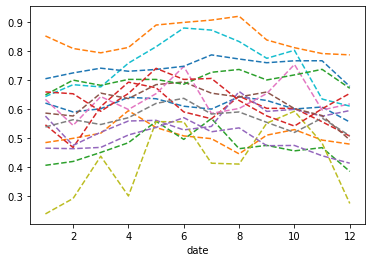

In [916]:
for s in stations['coal']:
    (eskom_data.loc[s,'EAF %'].groupby(eskom_data.loc[s,'EAF %'].index.month).mean()/100).plot(linestyle='--')


In [906]:
eskom_data.loc['Lethabo','PCLF %'].groupby(eskom_data.loc['Lethabo','PCLF %'].index.month).mean()

date
1     19.253333
2     18.520000
3     18.361667
4     10.580000
5      5.876667
6      4.630000
7      5.210000
8      7.868000
9     12.216000
10     8.552000
11    17.620000
12    21.470000
Name: PCLF %, dtype: float64

<AxesSubplot:>

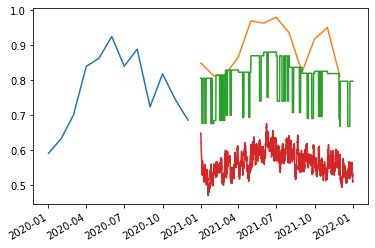

In [901]:
plt.plot(eskom_data.loc['Lethabo','EAF %'].loc['2020']/100)
plt.plot(1-eskom_data.loc['Lethabo','PCLF %'].loc['2021']/100)
availability['Lethabo_EAF'].plot()
(availability[stations['coal'][0:150]+'_EAF'].mean(axis=1)).plot()


In [880]:
eskom_data.loc['Tutuka','EAF %']

type  units  unit_size  capacity (MW)  \
station                date                                                 
Acacia                 2017-01-01   ocgt    3.0       57.0            171   
                       2017-02-01   ocgt    3.0       57.0            171   
                       2017-03-01   ocgt    3.0       57.0            171   
                       2017-04-01   ocgt    3.0       57.0            171   
                       2017-05-01   ocgt    3.0       57.0            171   
...                                  ...    ...        ...            ...   
non_coal_nuclear_total 2022-03-01  total    NaN        NaN           6303   
                       2022-04-01  total    NaN        NaN           6303   
                       2022-05-01  total    NaN        NaN           6303   
                       2022-06-01  total    NaN        NaN           6303   
                       2022-07-01  total    NaN        NaN           6303   

                                        EAF %     PCLF %    UCLF %    OCLF %  \
station                date                                                    
Acacia                 2017-01-01  100.000000   0.000000  0.000000  0.000000   
                       2017-02-01   96.500000   3.330000  0.170000  0.000000   
                       2017-03-01  100.000000   0.000000  0.000000  0.000000   
                       2017-04-01  100.000000   0.000000  0.000000  0.000000   
                       2017-05-01   99.620000   0.000000  0.380000  0.000000   
...                                       ...        ...       ...       ...   
non_coal_nuclear_total 2022-03-01   89.679951   7.406705  2.678674  0.234671   
                       2022-04-01   89.817772   6.471650  3.264027  0.446551   
                       2022-05-01   86.478283   5.556253  7.268504  0.696960   
                       2022-06-01   81.419748   8.127722  8.848802  1.603728   
                       2022-07-01   77.455474  14.740573  7.528066  0.275888   

                                     OUCLF %  
station                date                   
Acacia                 2017-01-01   0.000000  
                       2017-02-01   0.170000  
                       2017-03-01   0.000000  
                       2017-04-01   0.000000  
                       2017-05-01   0.380000  
...                                      ...  
non_coal_nuclear_total 2022-03-01   2.913344  
                       2022-04-01   3.710578  
                       2022-05-01   7.965464  
                       2022-06-01  10.452531  
                       2022-07-01   7.803954  

[2185 rows x 9 columns]

In [ ]:
tech='hydro'
eskom_data['capacity'] = eskom_data['EAF %']/100 * eskom_data['capacity (MW)'] 
eskom_data.loc[tech+'_total','capacity (MW)']=eskom_data.loc[stations[tech]].groupby(level=1).sum()['capacity (MW)'].values
#eskom_data.loc['coal_total','EAF %'] = eskom_data.loc[stations['coal']].mul(eskom_data.loc[stations['MW']]).divide(eskom_data.loc['coal_total','MW'])
eskom_data['installed']=np.nan
eskom_data.loc[stations[tech],'installed']=eskom_data.loc[stations[tech],'capacity (MW)'].divide(eskom_data.loc[tech+'_total','capacity (MW)']).values
eskom_data.loc[tech+'_total','EAF %'] = eskom_data.loc[stations[tech],'installed'].mul(eskom_data.loc[stations[tech],'EAF %']).groupby(level=1).sum().values
eskom_data.loc[tech+'_total','PCLF %'] = eskom_data.loc[stations[tech],'installed'].mul(eskom_data.loc[stations[tech],'PCLF %']).groupby(level=1).sum().values
eskom_data.loc[tech+'_total','UCLF %'] = eskom_data.loc[stations[tech],'installed'].mul(eskom_data.loc[stations[tech],'UCLF %']).groupby(level=1).sum().values
eskom_data.loc[tech+'_total','OCLF %'] = eskom_data.loc[stations[tech],'installed'].mul(eskom_data.loc[stations[tech],'OCLF %']).groupby(level=1).sum().values
eskom_data.loc[tech+'_total',:].to_clipboard() 

In [ ]:
df=pd.DataFrame(0,index=range(1,13),columns=[])
for y in range(2017,2023):
    if y<=2021:
        df.loc[:,y] = eskom_data.loc[tech+'_total',:].loc[str(y)]['PCLF %'].values
    else:
        df.loc[1:7,y]=eskom_data.loc[tech+'_total',:].loc[str(y)]['PCLF %'].values
df.to_clipboard()

In [ ]:
tech='hydro'
df['capacity'] = df['EAF %']/100 * df['MW'] 
df.loc[tech+'_total','MW']=df.loc[stations[tech]].groupby(level=1).sum()['MW'].values
#df.loc['coal_total','EAF %'] = df.loc[stations['coal']].mul(df.loc[stations['MW']]).divide(df.loc['coal_total','MW'])
df['installed']=np.nan
df.loc[stations[tech],'installed']=df.loc[stations[tech],'MW'].divide(df.loc[tech+'_total','MW']).values
df.loc[tech+'_total','EAF %'] = df.loc[stations[tech],'installed'].mul(df.loc[stations[tech],'EAF %']).groupby(level=1).sum().values
df.loc[tech+'_total','PCLF %'] = df.loc[stations[tech],'installed'].mul(df.loc[stations[tech],'PCLF %']).groupby(level=1).sum().values
df.loc[tech+'_total','UCLF %'] = df.loc[stations[tech],'installed'].mul(df.loc[stations[tech],'UCLF %']).groupby(level=1).sum().values
df.loc[tech+'_total','OCLF %'] = df.loc[stations[tech],'installed'].mul(df.loc[stations[tech],'OCLF %']).groupby(level=1).sum().values
df.loc[tech+'_total',:].to_clipboard() 

In [ ]:
date=pd.date_range('2019-01-01 00:00:00','2019-12-31 23:00:00',freq="1H")

In [ ]:
(df.loc[tech,'UCLF %']+df.loc[tech,'OCLF %']).loc['2021'].iloc[m-1]/100

In [ ]:
planned_monthly_avg_data

In [ ]:
unplanned_outages=0.28
availability=pd.DataFrame(0,index=date,columns=[])
actual_outages=pd.DataFrame(0,index=range(1,13),columns=[])
for s in stations['coal']:
    for m in range(1,13):
        availability.loc[availability.index.month==m,s+'_planned']=pclf['Average'].iloc[m-1]/100
        actual_outages.loc[m,s] = (df.loc[tech,'UCLF %']+df.loc[tech,'OCLF %']).loc['2021'].iloc[m-1]/100
    availability[s+'_unplanned']=0
    availability[s+'_EAF']=1


cnt=0
for s in stations['coal']:
    actual=(df.loc[tech,'UCLF %']+df.loc[tech,'OCLF %']).loc['2021'].mean()/100
    availability[s+'_unplanned']=actual/1.5
    while (availability[s+'_unplanned'].mean()<=actual):
        for unit in range(0,int(df.loc[s,'Units'][0])):
             random.seed(cnt)
             unit_outage=int(random.random()*8760)
             availability[s+'_unplanned'].iloc[unit_outage:unit_outage+72]=availability[s+'_unplanned'].iloc[unit_outage:unit_outage+72]+1/int(df.loc[s,'Units'][0])
             availability.loc[availability[s+'_unplanned']>0.5,s+'_unplanned']=0.5
             cnt=cnt+1
        availability[s+'_EAF']=1-availability[[s+'_planned',s+'_unplanned']].sum(axis=1)
#availability['EAF']=1-availability[['planned','unplanned']].sum(axis=1)

<AxesSubplot:>

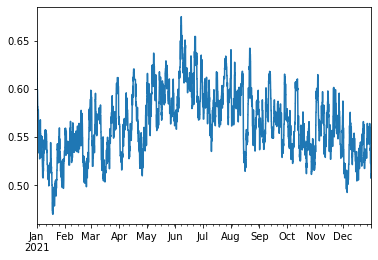

In [894]:
(availability[stations['coal'][0:150]+'_EAF'].mean(axis=1)).plot()


In [ ]:
s=stations['coal'][15]
plt.plot(availability[s+'_EAF'].groupby(availability.index.month).mean().values)
plt.plot(1-pclf['2021'].values/100-actual_outages[s].values)

In [ ]:
availability['Arnot_EAF'].groupby(availability.index.month).mean().values

In [ ]:
(1-availability[stations['coal']+'_planned'].mean(axis=1)).plot()

In [ ]:
df = pd.read_csv('../data/Eskom EAF data.csv',index_col=[1,0],parse_dates=True)
df['capacity'] = df['EAF %']/100 * df['MW'] 
df=df[df.type=='coal']
df.index=df.index.get_level_values(1)
variable='EAF %'
type_avg=df.groupby(level=0).mean()
type_avg.drop(['MW','capacity'],axis=1)
type_avg.loc[:,variable].groupby(type_avg.index.year).mean()

In [ ]:
df = pd.read_csv('../data/Eskom EAF data.csv',index_col=[1,0],parse_dates=True)
df['capacity'] = df['EAF %']/100 * df['MW'] 
stations=df[df.type=='coal'].index.get_level_values(0).unique()

installed_capacity=pd.DataFrame(0,index=stations,columns=range(2017,2023))
for s in stations:
    for y in range(2017,2023):
        installed_capacity.loc[s,y]=df.loc[(s,str(y)),'MW'].max()
normed_capacity=installed_capacity.divide(installed_capacity.sum())

In [ ]:
installed_capacity.divide(installed_capacity.sum())

In [ ]:
mean_pclf=type_avg[variable].groupby(type_avg.index.month).mean().to_clipboard()
for y in [2017,2018,2019,2020,2021,2022]:
    plt.plot(type_avg.loc[str(y),variable].values)

plt.plot(mean_pclf.values,'k--',linewidth=3)
plt.legend([2017,2018,2019,2020,2021,2022])

In [ ]:
mean_pclf=coal_plants['UCLF %'].groupby(coal_plants.index.month).mean()
for y in [2017,2018,2019,2020,2021,2022]:
    plt.plot(coal_plants.loc[str(y),'UCLF %'].values)

plt.plot(mean_pclf.values,'k--',linewidth=3)
plt.legend([2017,2018,2019,2020,2021,2022])

In [ ]:
plt.plot(eskom_data['coal_eaf'])
plt.plot(df[df.type=='coal'].groupby('Date').sum()['capacity'].divide(df[df.type=='coal'].groupby('Date').sum()['MW']))
plt.ylabel('Coal fleet EAF')

In [ ]:
plt.plot(eskom_data['coal_eaf']).plot()

In [ ]:
n = pypsa.Network("../results/version-0.6/networks/solved_ambitions_9-supply_redz_lcopt_LC.nc")


In [ ]:
wind_costs = n.generators.capital_cost[(n.generators.carrier=='onwind') & n.get_active_assets('Generator',2025)] + 
wind_capacity = n.generators.p_nom_opt[(n.generators.carrier=='onwind') & n.get_active_assets('Generator',2025)]
wind_energy = n.generators_t.p[wind_costs.index].loc[2025].sum().sum()

wind_capacity.mul(wind_costs).sum()/wind_energy

In [ ]:
wind_energy

In [ ]:
n.generators_t.p['EAST LONDON onwind_2025'].loc[2025].plot()

In [ ]:
n.generators.p_nom_opt[n.generators.carrier=='solar'].plot.bar()

In [ ]:
n=pypsa.Network("../networks/solved_original_27-supply_redz_lcopt_LC.nc")

In [ ]:
n.generators.p_nom_opt.drop('RSA load_shedding').plot.bar()

In [ ]:
n.snapshots.levels[0]

In [ ]:
n.generators.loc['RSA solar_2025',:]

In [ ]:
n.generators.loc['RSA CCGT_2025',:]

In [ ]:
n.get_active_assets('Generator',2030)

In [ ]:
n.generators